In [2]:
import numpy as np
import math as mp
import pandas as pd

In [3]:
import numpy as np

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.95  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

In [4]:
# Some parameter initialization. 
sigma = 5
beta = 0.8
W = 1
n=np.linspace(10,0,11)

In [5]:
# Example usage:
A   = generate_pattern_array_with_extra_rows(n)
Ass = np.ones((int(np.max(n))+3,1))
Ass[1,0] = 0.95 

0


In [6]:
tprod1 = beta**n*A

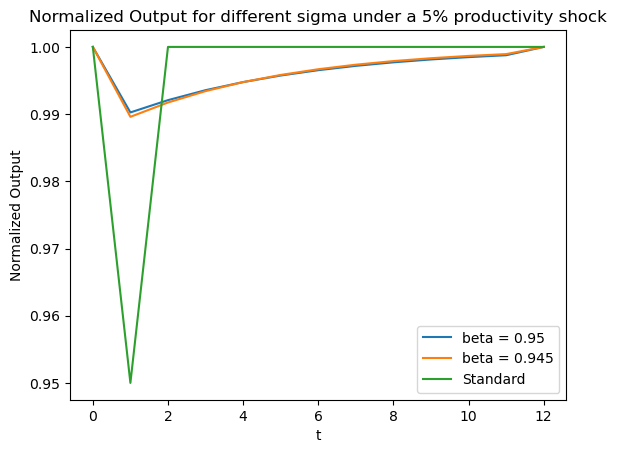

In [9]:
import matplotlib.pyplot as plt
PS = (np.sum(1/(Ass*beta**n)**(1-sigma),axis =1))**(1/(1-sigma))
for beta in [0.95,0.945]:
    tprod1 = beta**n

    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))


    plt.plot( (1/P0)*P0[0], label=f'beta = {beta}')  
plt.plot( (1/PS)*PS[0], label='Standard') 
plt.xlabel('t')
plt.ylabel('Normalized Output')
plt.legend()
plt.title('Normalized Output for different sigma under a 5% productivity shock')
plt.show()